In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import time
import pickle
import os
from math import log
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ParameterGrid,StratifiedKFold, cross_val_score

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, brier_score_loss, f1_score, log_loss,auc,roc_curve,auc

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
#from sklearn.utils.fixes import signature

from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\POS = EMI Scorecard Analysis")

In [3]:
##read datasets
df=pd.read_csv(os.getcwd()+r"\Data Files\MAR20 PSI.csv")

In [4]:
df.head()

,SKP_CREDIT_CASE,POS_MAR20_CIBIL,POS_MAR20_DND,POS_MAR20_FINBOX,POS_MAR20_SNA,POS_MAR20_TECHPROCESS,POS_MAR20_BEHAVIORAL,POS_MAR20_INTERNAL,POS_MAR20_VODAFONE_WOE,TIME_CREATION_DATE,PRODUCT_GROUP,POS_MAR20_GM_EXI
0,343123712,-3.46,-3.045046,-3.180000,-3.190000,-2.538085,-2.327200,-2.965553,0.0,01-07-21,CD,0.116420
1,343153646,-3.46,-3.045046,-3.223862,-3.190000,-2.457615,-4.808256,-3.506059,0.0,01-07-21,POS=EMI,0.017592
2,343134267,-3.46,-3.161580,-3.223862,-3.190000,-2.538085,-4.346108,-2.973946,0.0,01-07-21,POS=EMI,0.026289
3,343118124,-3.46,-3.045046,-3.180000,-3.190000,-2.538085,-2.789015,-3.376710,0.0,01-07-21,POS=EMI,0.076800
4,343137978,-3.46,-3.045046,-3.320254,-3.307703,-2.538085,-3.237405,-2.218338,0.0,01-07-21,CD,0.065167


In [5]:
df["TIME_CREATION_DATE"] = pd.to_datetime(df["TIME_CREATION_DATE"], format = '%d-%m-%y')

In [6]:
df.PRODUCT_GROUP.value_counts()

CD         40082
POS=EMI    27778
Name: PRODUCT_GROUP, dtype: int64

In [7]:
df = df[df["TIME_CREATION_DATE"]<= pd.datetime(2021,7,15)]

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


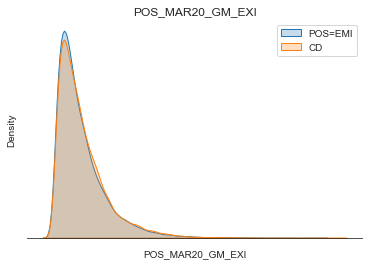

In [8]:
sns.set_style("white")

var = "POS_MAR20_GM_EXI"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

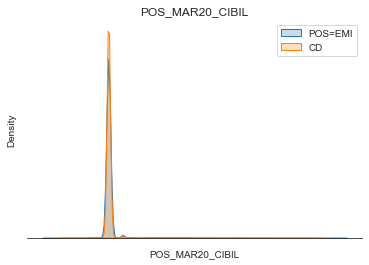

In [9]:
sns.set_style("white")

var = "POS_MAR20_CIBIL"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

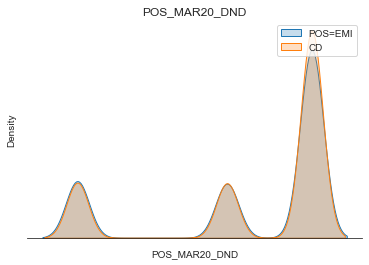

In [10]:
sns.set_style("white")

var = "POS_MAR20_DND"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

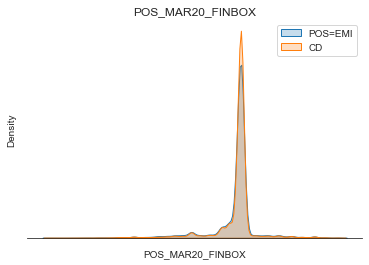

In [11]:
sns.set_style("white")

var = "POS_MAR20_FINBOX"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

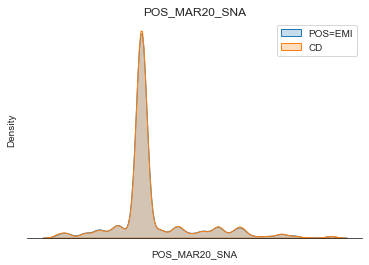

In [12]:
sns.set_style("white")

var = "POS_MAR20_SNA"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

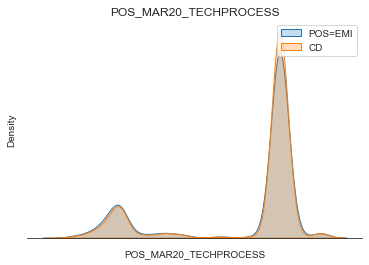

In [13]:
sns.set_style("white")

var = "POS_MAR20_TECHPROCESS"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

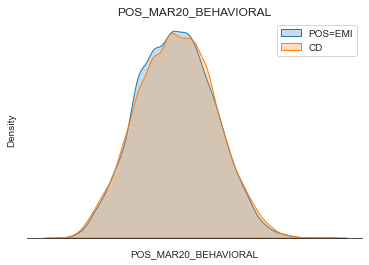

In [14]:
sns.set_style("white")

var = "POS_MAR20_BEHAVIORAL"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

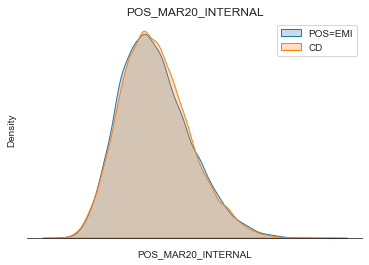

In [17]:
sns.set_style("white")

var = "POS_MAR20_INTERNAL"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)

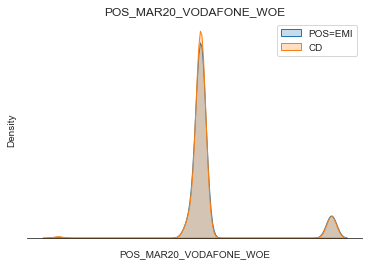

In [16]:
sns.set_style("white")

var = "POS_MAR20_VODAFONE_WOE"

posemi = df[df["PRODUCT_GROUP"]=="POS=EMI"][var]
cd = df[df["PRODUCT_GROUP"] == "CD"][var]

plot = sns.kdeplot(posemi, shade=True, label = 'POS=EMI').set_title(var)
plot = sns.kdeplot(cd, shade=True, label = 'CD')
plot.set(yticklabels=[], xticklabels = [])
plot.legend()
sns.despine(left=True)